### split_on_membership
- this script finds the trends of $\lambda_R$ vs $M_{halo}$ on cen/sat definition (also sub-divided into morph)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy
import seaborn as sns
import harry_plotter as hp

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [2]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/final_plots/cen_sat_comparison/'

# initiating catalog class objects.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)
total_cen = copy.deepcopy(total) 
total_sat = copy.deepcopy(total)

total_cen.group_membership(sel='cen', group_cat='lim') 
total_sat.group_membership(sel='sat', group_cat='lim') 

In [3]:
# creating copies of these objects and cutting on morphology.
ltgs = copy.deepcopy(total) 
ltgs_cen = copy.deepcopy(total_cen)
ltgs_sat = copy.deepcopy(total_sat)

ltgs.select_morphology('ltg')
ltgs_cen.select_morphology('ltg')
ltgs_sat.select_morphology('ltg')

# now for s0sa 
s0sa = copy.deepcopy(total) 
s0sa_cen = copy.deepcopy(total_cen)
s0sa_sat = copy.deepcopy(total_sat)

s0sa.select_morphology('s0sa')
s0sa_cen.select_morphology('s0sa')
s0sa_sat.select_morphology('s0sa')

# now for sbsds
sbsd = copy.deepcopy(total) 
sbsd_cen = copy.deepcopy(total_cen)
sbsd_sat = copy.deepcopy(total_sat)

sbsd.select_morphology('sbsd')
sbsd_cen.select_morphology('sbsd')
sbsd_sat.select_morphology('sbsd')

# etgs
etgs = copy.deepcopy(total) 
etgs_cen = copy.deepcopy(total_cen)
etgs_sat = copy.deepcopy(total_sat)

etgs.select_morphology('etg')
etgs_cen.select_morphology('etg')
etgs_sat.select_morphology('etg')

# unclassified
unclassified = copy.deepcopy(total) 
unclassified_cen = copy.deepcopy(total_cen)
unclassified_sat = copy.deepcopy(total_sat)

unclassified.select_morphology('unclassified')
unclassified_cen.select_morphology('unclassified')
unclassified_sat.select_morphology('unclassified')

### Creating four panel; all, ETGs, S0-Sas, Sb-Sds
- plotting as a function of $\mathrm{M_{halo}}$

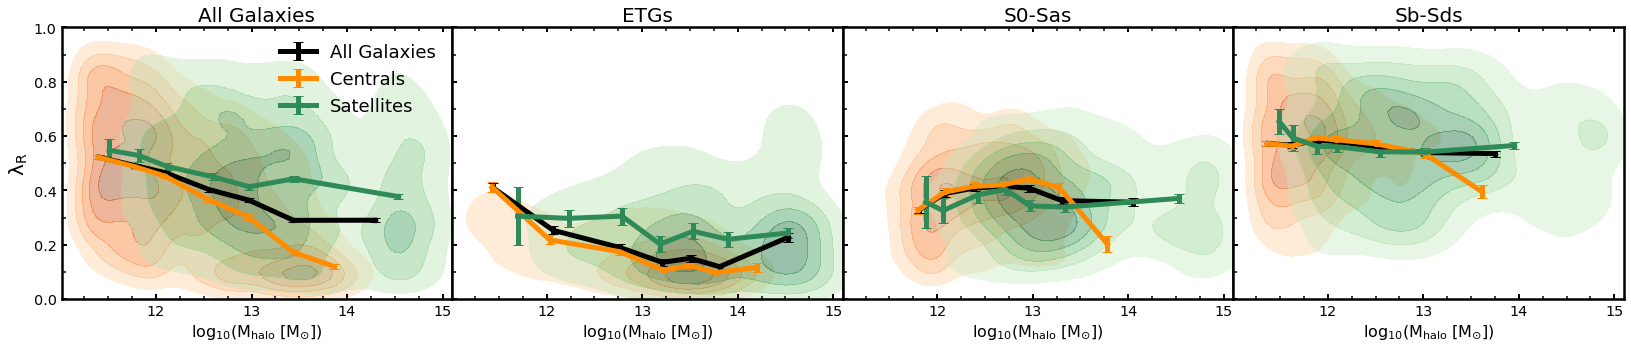

In [4]:
x_percentiles = [14.2, 28.4, 42.6, 56.8, 71, 85.2]
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 4, figsize=(28, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(total.df.log_halo_mass.values, x_percentiles) #np.array([11.5, 12, 12.5, 13, 13.5, 14])

total.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
total_cen.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Centrals', ax[0], colors=['darkorange'])
total_sat.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Satellites', ax[0], colors=['seagreen'])
sns.kdeplot(total_cen.df.log_halo_mass, total_cen.df.Lambda_Re, ax=ax[0], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(total_sat.df.log_halo_mass, total_sat.df.Lambda_Re, ax=ax[0], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

# ETGs
x_bins = np.percentile(etgs.df.log_halo_mass.values, x_percentiles) 

etgs.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'All galaxies', ax[1], colors=['k'])
etgs_cen.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Centrals', ax[1], colors=['darkorange'])
etgs_sat.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Satellites', ax[1], colors=['seagreen'])
sns.kdeplot(etgs_cen.df.log_halo_mass, etgs_cen.df.Lambda_Re, ax=ax[1], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(etgs_sat.df.log_halo_mass, etgs_sat.df.Lambda_Re, ax=ax[1], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

# Lenticulars
x_bins = np.percentile(s0sa.df.log_halo_mass.values, x_percentiles) 

s0sa.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'All galaxies', ax[2], colors=['k'])
s0sa_cen.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Centrals', ax[2], colors=['darkorange'])
s0sa_sat.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Satellites', ax[2], colors=['seagreen'])
sns.kdeplot(s0sa_cen.df.log_halo_mass, s0sa_cen.df.Lambda_Re, ax=ax[2], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(s0sa_sat.df.log_halo_mass, s0sa_sat.df.Lambda_Re, ax=ax[2], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

# Pure disks
x_bins = np.percentile(sbsd.df.log_halo_mass.values, x_percentiles) 

sbsd.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'All galaxies', ax[3], colors=['k'])
sbsd_cen.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Centrals', ax[3], colors=['darkorange'])
sbsd_sat.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Satellites', ax[3], colors=['seagreen'])
sns.kdeplot(sbsd_cen.df.log_halo_mass, sbsd_cen.df.Lambda_Re, ax=ax[3], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(sbsd_sat.df.log_halo_mass, sbsd_sat.df.Lambda_Re, ax=ax[3], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

titles = ['All Galaxies', 'ETGs', 'S0-Sas', 'Sb-Sds']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=18)
ax[0].set_xlim([11.01, 15.1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)

hp.xtick_format(1, 0.25, ax[0])
hp.ytick_format(0.2, 0.1, ax[0], '%1.1f')
plt.savefig(outpath+'group_lambdaR_mhalo.pdf', format='pdf', bbox_inches='tight')


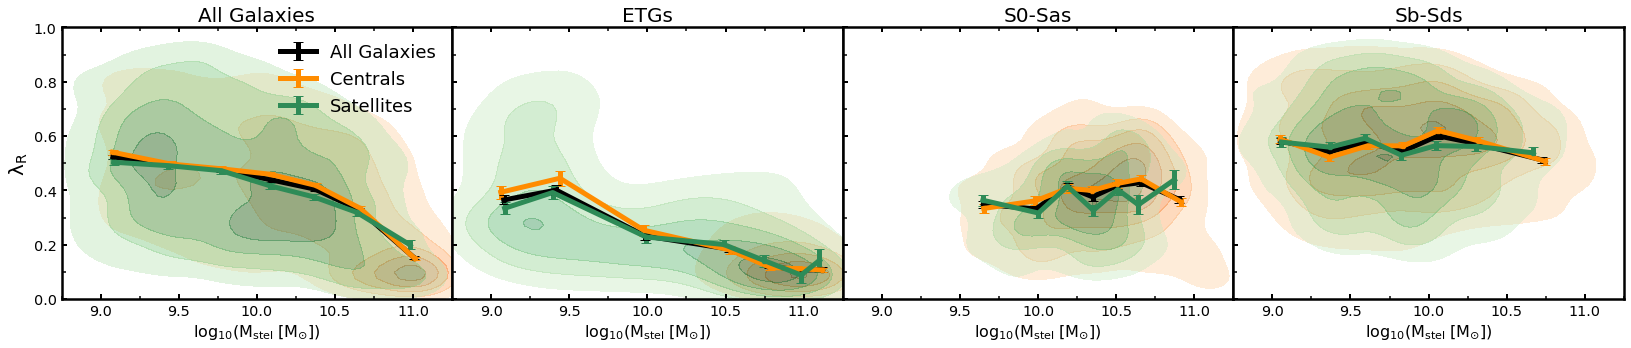

In [5]:
x_percentiles = [14.2, 28.4, 42.6, 56.8, 71, 85.2]
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 4, figsize=(28, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(total.df.nsa_elpetro_mass_logscale.values, x_percentiles) #np.array([11.5, 12, 12.5, 13, 13.5, 14])

total.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
total_cen.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Centrals', ax[0], colors=['darkorange'])
total_sat.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Satellites', ax[0], colors=['seagreen'])
sns.kdeplot(total_cen.df.nsa_elpetro_mass_logscale, total_cen.df.Lambda_Re, ax=ax[0], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(total_sat.df.nsa_elpetro_mass_logscale, total_sat.df.Lambda_Re, ax=ax[0], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

# ETGs
x_bins = np.percentile(etgs.df.nsa_elpetro_mass_logscale.values, x_percentiles) 

etgs.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'All galaxies', ax[1], colors=['k'])
etgs_cen.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Centrals', ax[1], colors=['darkorange'])
etgs_sat.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Satellites', ax[1], colors=['seagreen'])
sns.kdeplot(etgs_cen.df.nsa_elpetro_mass_logscale, etgs_cen.df.Lambda_Re, ax=ax[1], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(etgs_sat.df.nsa_elpetro_mass_logscale, etgs_sat.df.Lambda_Re, ax=ax[1], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

# Lenticulars
x_bins = np.percentile(s0sa.df.nsa_elpetro_mass_logscale.values, x_percentiles) 

s0sa.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'All galaxies', ax[2], colors=['k'])
s0sa_cen.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Centrals', ax[2], colors=['darkorange'])
s0sa_sat.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Satellites', ax[2], colors=['seagreen'])
sns.kdeplot(s0sa_cen.df.nsa_elpetro_mass_logscale, s0sa_cen.df.Lambda_Re, ax=ax[2], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(s0sa_sat.df.nsa_elpetro_mass_logscale, s0sa_sat.df.Lambda_Re, ax=ax[2], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

# Pure disks
x_bins = np.percentile(sbsd.df.nsa_elpetro_mass_logscale.values, x_percentiles) 

sbsd.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'All galaxies', ax[3], colors=['k'])
sbsd_cen.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Centrals', ax[3], colors=['darkorange'])
sbsd_sat.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Satellites', ax[3], colors=['seagreen'])
sns.kdeplot(sbsd_cen.df.nsa_elpetro_mass_logscale, sbsd_cen.df.Lambda_Re, ax=ax[3], cmap="Oranges", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(sbsd_sat.df.nsa_elpetro_mass_logscale, sbsd_sat.df.Lambda_Re, ax=ax[3], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

titles = ['All Galaxies', 'ETGs', 'S0-Sas', 'Sb-Sds']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=18)
ax[0].set_xlim([8.75, 11.25])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)

hp.xtick_format(0.5, 0.25, ax[0], '%1.1f')
hp.ytick_format(0.2, 0.1, ax[0], '%1.1f')
plt.savefig(outpath+'group_lambdaR_mstel.pdf', format='pdf', bbox_inches='tight')


### Also creating an stellar mass and halo mass side by side *only* for all galaxies.

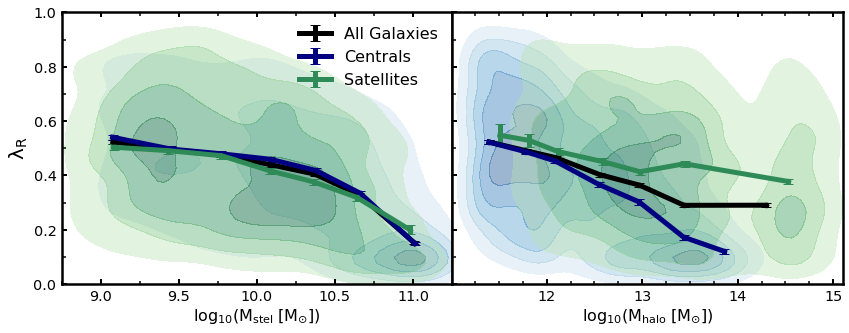

In [13]:
x_percentiles = [14.2, 28.4, 42.6, 56.8, 71, 85.2]
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey='all')

# stellar mass
x_bins = np.percentile(total.df.nsa_elpetro_mass_logscale.values, x_percentiles) #np.array([11.5, 12, 12.5, 13, 13.5, 14])

total.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
total_cen.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Centrals', ax[0], colors=['navy'])
total_sat.plot_binned_percentiles_three_props("nsa_elpetro_mass_logscale", "Lambda_Re", "nsa_elpetro_mass_logscale", x_bins, z_percentiles, 'Satellites', ax[0], colors=['seagreen'])
sns.kdeplot(total_cen.df.nsa_elpetro_mass_logscale, total_cen.df.Lambda_Re, ax=ax[0], cmap="Blues", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(total_sat.df.nsa_elpetro_mass_logscale, total_sat.df.Lambda_Re, ax=ax[0], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

ax[0].legend(frameon=False, fontsize=16)
ax[0].set_xlim([8.75, 11.25])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
ax[0].set_xlabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=16)
hp.xtick_format(0.5, 0.25, ax[0], '%1.1f')
hp.ytick_format(0.2, 0.1, ax[0], '%1.1f')

# halo mass
x_bins = np.percentile(total.df.log_halo_mass.values, x_percentiles) 

total.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
total_cen.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Centrals', ax[1], colors=['navy'])
total_sat.plot_binned_percentiles_three_props("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, 'Satellites', ax[1], colors=['seagreen'])
sns.kdeplot(total_cen.df.log_halo_mass, total_cen.df.Lambda_Re, ax=ax[1], cmap="Blues", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)
sns.kdeplot(total_sat.df.log_halo_mass, total_sat.df.Lambda_Re, ax=ax[1], cmap="Greens", shade=True, shade_lowest=False, n_levels=5, alpha=0.4)

ax[1].set_xlim([11.01, 15.1])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=16)
ax[1].set_ylabel(None)
hp.xtick_format(1, 0.25, ax[1])
hp.ytick_format(0.2, 0.1, ax[1], '%1.1f')

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'group_lambdaR_mstel_mhalo_comparison.pdf', format='pdf', bbox_inches='tight')
